In [130]:
import wfdb
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from scipy.signal import spectrogram

# Relevant record information
### fs: Frequency at which the signals were digitized (in this case 360Hz)
* time duration = sample count / sampling frequency
* 360Hz signal, which means 360 samples per second with a total length per record as 650000, or ~30 minutes
### sig_len: Signal length (or data points) in the record, where we have 650000 per record
### n_sig: How many channels were recorded.
* channel/Lead: refers to a single electrical signal recording from the heart, representing the voltage difference between two specific electrodes placed on the body (in this case two channels/Leads)
### units: Units for each channel (millivolts)
### sig_name: The signal name for each channel
### comments: Any comments written in the header by cardiologists

In [131]:
# Path to your data directory
data_dir = 'src/data/mit-bih-arrhythmia-database-1.0.0'

# List the files in the directory to find one of the ECG files
ecg_file = '100.dat'

# wfdb reads through the .hea and .dat files for record information
# .hea: header file with relevant information about the record (human-readable)
# .dat: binary data file with raw digitized ECG waveforms (machine-readable) 
# sampto: The sample number at which to stop reading for all channels. Reads the entire duration by default.

# Load the ECG data using WFDB
record = wfdb.rdrecord(os.path.join(data_dir, ecg_file.replace('.dat', '')))  # Load the full record

# Inspect basic information about the data
print(f"Record Name: {record.record_name}")
print(f"Number of Signals: {record.p_signal.shape[1]}")  # Use shape to get number of signals
print(f"Sampling Frequency: {record.fs} Hz")
print(f"Signal Shape: {record.p_signal.shape}")

Record Name: 100
Number of Signals: 2
Sampling Frequency: 360 Hz
Signal Shape: (650000, 2)


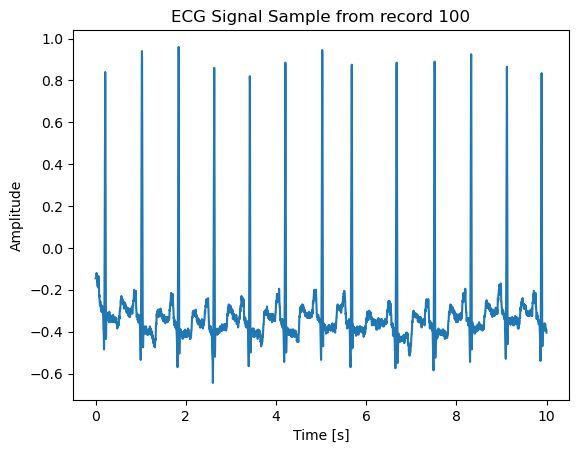

In [132]:
# Plot the first 10 seconds of the first ECG signal to get a sense of the data
time = np.arange(0, 10, 1/record.fs)  # Time vector for 10 seconds
plt.plot(time, record.p_signal[:len(time), 0])  # Plot the first signal (ECG)
plt.title(f'ECG Signal Sample from record {record.record_name}')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

Nothing crazy showing here, this seems to be baseline?

In [133]:
# Path to your data directory
data_dir = 'src/data/mit-bih-arrhythmia-database-1.0.0'

# Define the ECG file base (e.g., 'a01')
ecg_file_base = '100'

# Load the annotation file (e.g., 'a01.apn')
# wfdb reads through .atr for annotation info and creates an Annotation object
annotation_file = os.path.join(data_dir, f"{ecg_file_base}")
annotations = wfdb.rdann(annotation_file, 'atr')  # Read the arrhythmia annotations

label_count = 0
# Accessing the annotations and printing the relevant details
for i in range(len(annotations.sample)):
    time = annotations.sample[i] / annotations.fs  # Convert sample to time (seconds)
    label = annotations.symbol[i]  # Get the label of the annotation
    print(f"Time: {time:.2f} seconds - Label: {label}")



Time: 0.05 seconds - Label: +
Time: 0.21 seconds - Label: N
Time: 1.03 seconds - Label: N
Time: 1.84 seconds - Label: N
Time: 2.63 seconds - Label: N
Time: 3.42 seconds - Label: N
Time: 4.21 seconds - Label: N
Time: 5.03 seconds - Label: N
Time: 5.68 seconds - Label: A
Time: 6.67 seconds - Label: N
Time: 7.52 seconds - Label: N
Time: 8.33 seconds - Label: N
Time: 9.12 seconds - Label: N
Time: 9.89 seconds - Label: N
Time: 10.73 seconds - Label: N
Time: 11.58 seconds - Label: N
Time: 12.41 seconds - Label: N
Time: 13.23 seconds - Label: N
Time: 14.06 seconds - Label: N
Time: 14.85 seconds - Label: N
Time: 15.65 seconds - Label: N
Time: 16.44 seconds - Label: N
Time: 17.26 seconds - Label: N
Time: 18.13 seconds - Label: N
Time: 18.95 seconds - Label: N
Time: 19.74 seconds - Label: N
Time: 20.53 seconds - Label: N
Time: 21.31 seconds - Label: N
Time: 22.09 seconds - Label: N
Time: 22.90 seconds - Label: N
Time: 23.72 seconds - Label: N
Time: 24.55 seconds - Label: N
Time: 25.39 seconds - 

In [134]:
# Count the occurrences of each label
label_counts = Counter(annotations.symbol)

print("Label Distribution:")
for label, count in label_counts.items():
    print(f"{label}: {count}")

Label Distribution:
+: 1
N: 2239
A: 33
V: 1


## Plot spectogram with labels of length 10 seconds

0
1
2
3
4
5
6
7
8
9
10
11
12
13


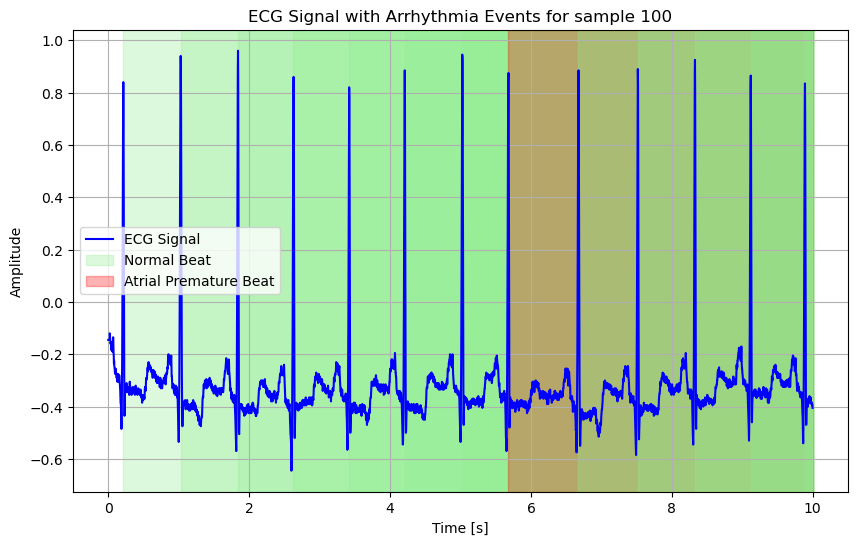

In [ ]:
# Plot spectogram with labels of length 50 seconds
# Get the time and the signal
time = np.arange(0, len(record.p_signal) / record.fs, 1 / record.fs)  # Time vector for the ECG

time = time[: 10 * record.fs]
# Plot the ECG signal (for the first channel)
plt.figure(figsize=(10, 6))
#plt.plot(time, record.p_signal[:, 0], label="ECG Signal", color='blue')

plt.plot(time, record.p_signal[: len(time), 0], label="ECG Signal", color='blue')


for i in range(len(annotations.sample)):
    
    start_time = annotations.sample[i] / annotations.fs
    
    if start_time > 10:  # Ignore annotations beyond 10 seconds
        break

    print(i)
    if annotations.symbol[i] == 'N':  
        
        end_time = min(start_time + 60, 10)
        if i == 1:
            plt.axvspan(start_time, end_time, color='lightgreen', alpha=0.3, label="Normal Beat")
        else:
            plt.axvspan(start_time, end_time, color='lightgreen', alpha=0.3)
    if annotations.symbol[i] == 'A':  
        end_time = min(start_time + 60, 10)
        plt.axvspan(start_time, end_time, color='red', alpha=0.3, label="Atrial Premature Beat")
    if annotations.symbol[i] == 'V':  
        end_time = min(start_time + 60, 10)
        plt.axvspan(start_time, end_time, color='yellow', alpha=0.3, label="V")
    if annotations.symbol[i] == 'L':  
        end_time = min(start_time + 60, 10)
        plt.axvspan(start_time, end_time, color='purple', alpha=0.3, label="L")
    if annotations.symbol[i] == 'R':  
        end_time = min(start_time + 60, 10)
        plt.axvspan(start_time, end_time, color='orange', alpha=0.3, label="R")
    if annotations.symbol[i] == '/':  
        end_time = min(start_time + 60, 10)
        plt.axvspan(start_time, end_time, color='blue', alpha=0.3, label="/")
    

# Add labels and title
plt.title(f"ECG Signal with Arrhythmia Events for sample {ecg_file_base}")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()


## Plot spectogram with labels of length 50 seconds

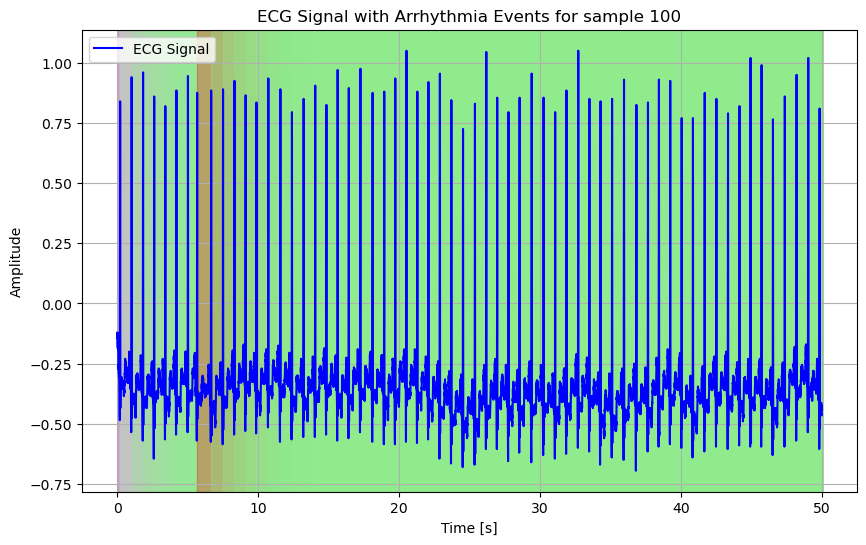

In [ ]:
# Plot spectogram with labels of length 50 seconds
# Get the time and the signal
time = np.arange(0, len(record.p_signal) / record.fs, 1 / record.fs)  # Time vector for the ECG

time = time[: 50 * record.fs]
# Plot the ECG signal (for the first channel)
plt.figure(figsize=(10, 6))
#plt.plot(time, record.p_signal[:, 0], label="ECG Signal", color='blue')

plt.plot(time, record.p_signal[: len(time), 0], label="ECG Signal", color='blue')


for i in range(len(annotations.sample)):
    
    start_time = annotations.sample[i] / annotations.fs
    
    if start_time > 50:  # Ignore annotations beyond 500 seconds
        break

    if annotations.symbol[i] == 'N':  # Look for ventricular arrhythmia annotations
            end_time = min(start_time + 60, 50)
            plt.axvspan(start_time, end_time, color='lightgreen', alpha=0.3)
    if annotations.symbol[i] == 'A':  # Look for arrhythmia annotations
        end_time = min(start_time + 60, 50)  # Ensure highlight stays within 500s
        plt.axvspan(start_time, end_time, color='red', alpha=0.3)
    if annotations.symbol[i] == 'V':  # Look for ventricular arrhythmia annotations
        end_time = min(start_time + 60, 50)
        plt.axvspan(start_time, end_time, color='yellow', alpha=0.3)
    if annotations.symbol[i] == '+':  # Look for ventricular arrhythmia annotations
        end_time = min(start_time + 60, 50)
        plt.axvspan(start_time, end_time, color='purple', alpha=0.3)
    

# Add labels and title
plt.title(f"ECG Signal with Arrhythmia Events for sample {ecg_file_base}")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()


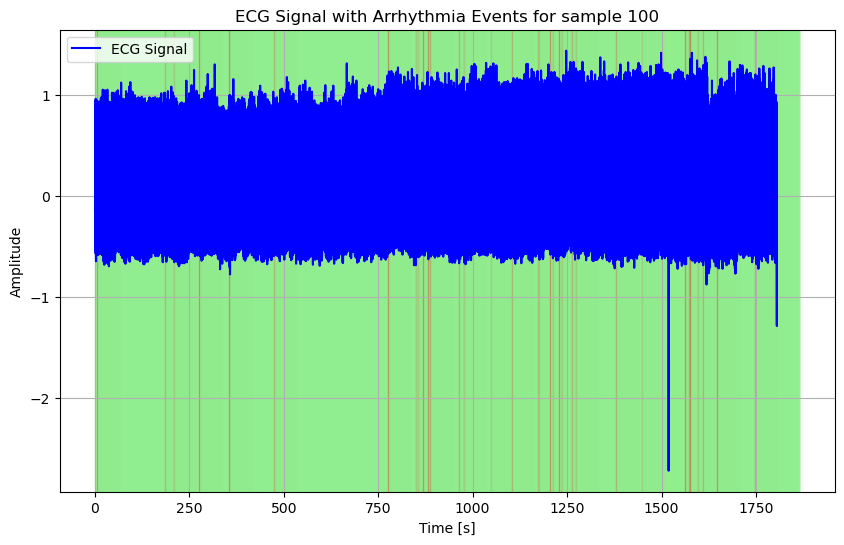

In [143]:
# Get the time and the signal
time = np.arange(0, len(record.p_signal) / record.fs, 1 / record.fs)  # Time vector for the ECG


# Plot the ECG signal (for the first channel)
plt.figure(figsize=(10, 6))
#plt.plot(time, record.p_signal[:, 0], label="ECG Signal", color='blue')

plt.plot(time, record.p_signal[: len(time), 0], label="ECG Signal", color='blue')


for i in range(len(annotations.sample)):
    
    start_time = annotations.sample[i] / annotations.fs
    

    if annotations.symbol[i] == 'N':  # Look for ventricular arrhythmia annotations
        
        end_time = start_time + 60  # Assumption: 1 minute duration for each arrhythmia annotation
        plt.axvspan(start_time, end_time, color='lightgreen', alpha=0.3)
    if annotations.symbol[i] == 'A':  # Look for arrhythmia annotations
        
        end_time = start_time + 60  # Assumption: 1 minute duration for each arrhythmia annotation
        plt.axvspan(start_time, end_time, color='red', alpha=0.3)
    if annotations.symbol[i] == 'V':  # Look for ventricular arrhythmia annotations
        
        end_time = start_time + 60  # Assumption: 1 minute duration for each arrhythmia annotation
        plt.axvspan(start_time, end_time, color='yellow', alpha=0.3)
    if annotations.symbol[i] == 'L':  # Look for ventricular arrhythmia annotations
        
        end_time = start_time + 60  # Assumption: 1 minute duration for each arrhythmia annotation
        plt.axvspan(start_time, end_time, color='purple', alpha=0.3)
    if annotations.symbol[i] == 'R':  # Look for ventricular arrhythmia annotations
        
        end_time = start_time + 60  # Assumption: 1 minute duration for each arrhythmia annotation
        plt.axvspan(start_time, end_time, color='orange', alpha=0.3)
    if annotations.symbol[i] == '/':  # Look for ventricular arrhythmia annotations
        
        end_time = start_time + 60  # Assumption: 1 minute duration for each arrhythmia annotation
        plt.axvspan(start_time, end_time, color='blue', alpha=0.3)
    

# Add labels and title
plt.title(f"ECG Signal with Arrhythmia Events for sample {ecg_file_base}")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()


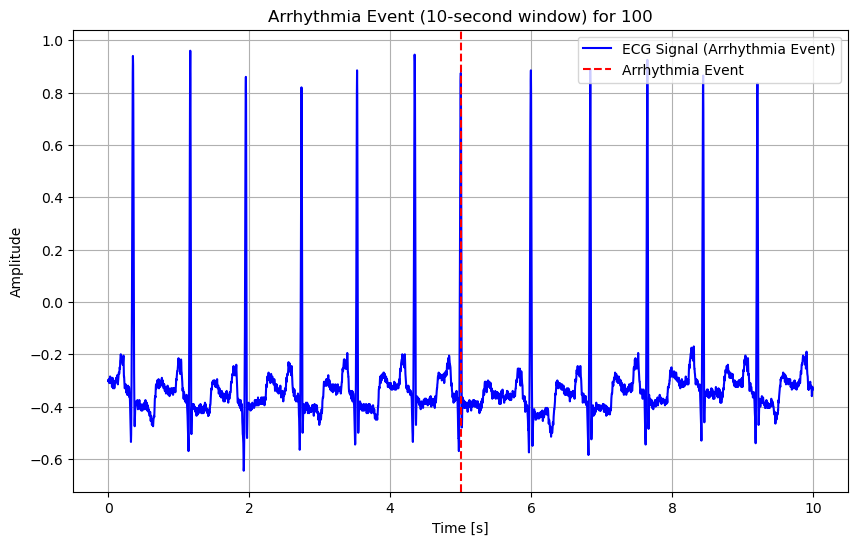

In [173]:
# Choose the first arrhythmia event ('A')
for i in range(len(annotations.sample)):
    if annotations.symbol[i] == 'A':  # Look for the first arrhythmia annotation
        arrhythmia_sample = annotations.sample[i]
        break

# Define the time window around the arrhythmia event (±5 seconds around the event)
window_start = arrhythmia_sample - 5 * record.fs  # Start 5 seconds before the arrhythmia
window_end = arrhythmia_sample + 5 * record.fs    # End 5 seconds after the arrhythmia

# Extract the ECG signal within the 10-second window
ecg_window = record.p_signal[window_start:window_end, 0]  # First channel
time_window = np.arange(0, len(ecg_window)) / record.fs  # Time vector for the window

# Plot the ECG signal for this 10-second window
plt.figure(figsize=(10, 6))
plt.plot(time_window, ecg_window, label="ECG Signal (Arrhythmia Event)", color='blue')

# Highlight the arrhythmia event in the middle of the window
plt.axvline(x=5, color='red', linestyle='--', label='Arrhythmia Event')

# Add labels and title
plt.title(f"Arrhythmia Event (10-second window) for {ecg_file_base}")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()